# Práctica 2: Enfermedad Cardiovascular

Esta es la segunda práctica de la asignatura de **Análisis de Datos** del grado de *Ingeniería Informática* de la *UC3M* durante el curso 2020/21.


Autores:  
***Alba Reinders Sánchez***, 100383444, gr.83  
***Alejandro Valverde Mahou***, 100383383, gr.83

![](./images/img.jpg)

El objetivo de esta práctica es predecir si un paciente tiene o no una enfermedad cardiovascular. Se trata de un *problema de clasificación* con salida es binaria. 

Este sistema se quiere usar como ayuda al diagnóstico médico, por lo que es muy importante que el modelo tenga capacidad explicativa y su interpretación debe poder determinar qué atributos son más relevante para el diagnóstico.

El conjunto de datos está compuesto por **70000** ejemplos (pacientes), cada uno con **11** atributos. Más la clase a predecir.

## Tarea 1: Entrenamiento y evaluación de un árbol de decisión

Dado que se requiere de una capacidad explicatica, se plantea usar un **árbol de decisión**, usando, en este primer acercamiento, todas las variables disponibles.

### Carga de los datos

Antes de poder entrenar el modelo, es necesario cargar los datos del fichero.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("cardio_train.csv", sep=';')
header = data.columns
display(data)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Crear el modelo

Una vez se tienen los datos, ya se puede crear el modelo.

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
dtc = DecisionTreeClassifier()

### Entrenar el modelo

In [5]:
X = data[header[1:-1]] #Se quita, ademas de la clase, el id
y = data[header[-1]]
dtc.fit(X, y)

DecisionTreeClassifier()

### Evaluar el modelo

Para evaluar el modelo se va a usar la **matriz de confusión** y, usando los valores que proporcione, se van a calcular:

 * **Tasa de aciertos**
 * **Precisión**
 * **Sensibilidad**
 * **Tasa de falsos positivos**
 * **Especificidad**
 * **Puntuación F1**
 * **Área bajo de la curva ROC**

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
y_pred = dtc.predict(X)

In [8]:
def confusionMatrix(y, y_pred):
    true_matrix = ['Real Enfermedad', 'Real No Enfermedad']
    pred_matrix = ['Predicho Enfermedad', 'Predicho No Enfermedad']

    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    return pd.DataFrame([[tp, fp], [fn, tn]], columns=true_matrix, index=pred_matrix)

In [9]:
matrix = confusionMatrix(y, y_pred)
display(matrix)

,Real Enfermedad,Real No Enfermedad
Predicho Enfermedad,34962,0
Predicho No Enfermedad,17,35021


El árbol de decisión, dado que está evaluando sobre el conjunto de entrenamiento, no hay incoherencias en los datos (dos ejemplos idénticos con clases diferentes), y no se ha especificado una profundidad del árbol máxima, siempre va a ser capaz de realizar una predicción perfecta.

Esto no indica que este árbol haya generado un buen clasificador, porque no se ha evaluado con ejemplos desconocidos para el modelo.

Aún así, se va a proceder a evaluar este modelo con las métricas mencionadas anteriormente, para poder realizar una explicación en mayor profundidad de las mismas, aunque sus valores no aporten demasiada información.

#### Tasa de aciertos

También llamada *accuracy*, y mide el porcentaje de instancias **correctamente clasificadas**. Aporta una visión general de como de bueno es el modelo desde una perspectiva general.

$\displaystyle accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
def accuracy(y, y_pred):
    return accuracy_score(y, y_pred) * 100

In [12]:
acc = accuracy(y, y_pred)
print("Se clasifican correctamente un " + str(acc) + "% de las instancias")

Se clasifican correctamente un 99.97571428571429% de las instancias


Como se ha mencionado anteriormente, estas métricas van a sacar valores perfectos.

#### Precisión

Identifica que porcentaje de instancias clasificadas como positivas, lo **son realmente**. Es útil para conocer la precisión del modelo cuando asegura que una instancia es positiva.

$\displaystyle precision = \frac{TP}{TP + FP}$

In [13]:
from sklearn.metrics import precision_score

In [14]:
def precision(y, y_pred):
    return precision_score(y, y_pred) * 100

In [15]:
prec = precision(y, y_pred)
print("Se clasifican correctamente un " + str(prec) + "% de las instancias positivas")

Se clasifican correctamente un 100.0% de las instancias positivas


#### Sensibilidad

También denominado *recall* o *sensitivity*. Indica qué porcentaje de las instancias positivas son clasificadas **correctamente**. Es útil para conocer la precisión del modelo para determinar que una instancia positiva lo es, o se equivoca.

$\displaystyle recall = \frac{TP}{TP + FN}$

In [16]:
from sklearn.metrics import recall_score

In [17]:
def recall(y, y_pred):
    return recall_score(y, y_pred) * 100

In [18]:
rec = recall(y, y_pred)
print("El modelo acierta un " + str(rec) + "% de las instancias positivas")

El modelo acierta un 99.95139941107522% de las instancias positivas


#### Tasa de falsos positivos

Denominada por sus siglas en inglés *FPR*. Indica qué porcentaje de las instancias negativas son clasificadas **incorrectamente**. Es útil para conocer la precisión del modelo para determinar que una instancia negativa lo es, o se equivoca. 

$\displaystyle FPR = \frac{FP}{FP + TN}$

In [19]:
def FPR(y, ypred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    return (fp/(fp + tn)) * 100

In [20]:
fpr = FPR(y, y_pred)
print("El modelo falla un " + str(fpr) + "% de las instancias negativas")

El modelo falla un 0.0% de las instancias negativas


#### Especificidad

Similar al *recall*, pero con el caso de los negativos. Indica qué porcentaje de las instancias negativas son clasificadas **correctamente**. Es útil para conocer la precisión del modelo para determinar que una instancia negativa lo es, o se equivoca.

$\displaystyle specificity = \frac{TN}{TN + FP}$

In [21]:
def specificity(y, y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    return (tn/(fp + tn)) * 100

In [22]:
spec = specificity(y, y_pred)
print("El modelo acierta un " + str(spec) + "% de las instancias negativas")

El modelo acierta un 100.0% de las instancias negativas


#### Puntuación F1

Indica un valor que agrega la precisión y *recall* mediante una media armónica. El mejor valor es 1 y el peor, 0

$\displaystyle F1 = 2 \frac{precision · recall}{precision + recall}$

In [23]:
from sklearn.metrics import f1_score

In [24]:
def F1(y, y_pred):
    return f1_score(y, y_pred)

In [25]:
f1 = F1(y, y_pred)
print("La puntuación F1 del modelo es: " + str(f1))

La puntuación F1 del modelo es: 0.999756937990592


#### Área bajo la curva ROC

Hace referencia a la cantidad de instancias bien clasificadas si se va modificando el umbral de la *curva ROC*.

In [26]:
import matplotlib.pyplot as plt

In [27]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

**Curva ROC**

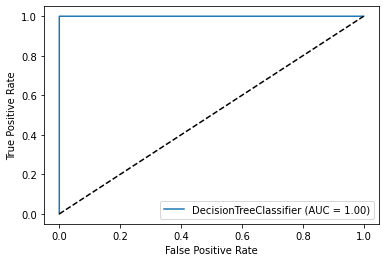

In [28]:
plot_roc_curve(dtc, X, y)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [29]:
def AUROC(y, y_pred):
    return roc_auc_score(y, y_pred) * 100

In [30]:
auroc = AUROC(y, y_pred)
print("El área bajo la curva del modelo es el: " + str(auroc) + "%")

El área bajo la curva del modelo es el: 99.97569970553761%


Para resumir, todas las métricas son:

In [31]:
def evaluation(y, y_pred):
    acc = accuracy(y, y_pred)
    prec = precision(y, y_pred)
    rec = recall(y, y_pred)
    fpr = FPR(y, y_pred)
    spec = specificity(y, y_pred)
    f1 = F1(y, y_pred)
    auroc = AUROC(y, y_pred)

    print("Se clasifican correctamente un " + str(acc) + "% de las instancias")
    print("Se clasifican correctamente un " + str(prec) + "% de las instancias positivas")
    print("El modelo acierta un " + str(rec) + "% de las instancias positivas")
    print("El modelo falla un " + str(fpr) + "% de las instancias negativas")
    print("El modelo acierta un " + str(spec) + "% de las instancias negativas")
    print("La puntuación F1 del modelo es: " + str(f1))
    print("El área bajo la curva del modelo es el: " + str(auroc) + "%")
    
    return acc, prec, rec, fpr, spec, f1, auroc

In [32]:
ev = evaluation(y, y_pred)

Se clasifican correctamente un 99.97571428571429% de las instancias
Se clasifican correctamente un 100.0% de las instancias positivas
El modelo acierta un 99.95139941107522% de las instancias positivas
El modelo falla un 0.0% de las instancias negativas
El modelo acierta un 100.0% de las instancias negativas
La puntuación F1 del modelo es: 0.999756937990592
El área bajo la curva del modelo es el: 99.97569970553761%


## Tarea 2: Inspección del árbol de decisión

Una vez realizado el modelo, hay que entenderlo. Para ello se va a inspeccionar el árbol de clasificación generado, y después se van a responder las siguientes preguntas:

 1. **¿Qué relevancia tienen los exámenes clínicos realizados a la hora de determinar la existencia de una enfermedad cardiovascular?**
 
 2. **¿Es relevante la información (subjetiva) proporcionada por los pacientes a la hora de determinar la presencia de una enfermedad cardiovascular?**

In [33]:
from sklearn import tree
from subprocess import call

In [34]:
print("Profundidad del árbol generado:", dtc.get_depth())

Profundidad del árbol generado: 65


Dada la gran profundidad del árbol, que hace prácticamente imposible visualizarlo correctamente, se ha decidido analizar visualmente exclusivamente los 3 primeros niveles del árbol.

In [35]:
tree.export_graphviz(dtc, out_file='tree.dot', feature_names=X.columns, max_depth=3)
call(['dot', '-T', 'png', 'tree.dot', '-o', 'images/tree.png'])

0

El árbol toma la siguiente forma:
![](images/tree.png)

In [36]:
features_importance = pd.DataFrame([header[1:-1], dtc.feature_importances_], index=["", ""])
display(features_importance)

,0,1,2,3,4,5,6,7,8,9,10
,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
,0.3253,0.0185543,0.146875,0.15858,0.230837,0.040046,0.0325736,0.018036,0.00875756,0.00766278,0.0127771


### ¿Qué relevancia tienen los exámenes clínicos realizados a la hora de determinar la existencia de una enfermedad cardiovascular?

Las variables que forman parte de los exámenes clínicos son:

 * *ap_hi*
 * *ap_lo*
 * *cholesterol*
 * *gluc*
 
Como se puede apreciar en la imagen anterior, el atributo con mayor relevancia es *ap_hi*. Además, todas las variables del examen clínico se encuentran en los 3 primeros niveles, por lo que se podría afirmar que tienen gran importancia a la hora de determinar si el paciente padece o no de una enfermedad cardiovascular. Esto se debe a que son los atributos que son capaces de dividir de mejor forma al conjunto de datos.

Asimismo, los valores con más importancia para el árbol son tanto *age* como *ap_hi*, por lo que el valor de examen clínico con más importancia sería este atributo, sin despreciar la utilidad de los demas, que también poseen números altos, y se encuentran en las partes altas del árbol.

In [37]:
tree.export_graphviz(dtc, out_file='tree2.dot', feature_names=X.columns, max_depth=4)
call(['dot', '-T', 'png', 'tree2.dot', '-o', 'images/tree2.png'])

0

![](images/tree2.png)

### ¿Es relevante la información (subjetiva) proporcionada por los pacientes a la hora de determinar la presencia de una enfermedad cardiovascular?

Los valores subjetivos son:

 * *smoke*
 * *alco*
 * *active*

Ninguno de los valores subjetivos aparecen en los 3 primeros niveles, pero sí aparecen tanto *active* como *smoke* en el 4º nivel, por lo que se puede afirmar que poseen cierta importancia.

Aún así, el modelo les asigna las 3 importancias más bajas. En orden descendente de relevancia, son: *active*, *alco* y *smoke*.

Esto indica que, dentro de los atributos del estudio, son los menos determinantes.

## Tarea 3: Comparativa de modelos

Dado que el modelo anterior no es de gran utilidad, entre otras cosas, porque no hay división entre conjunto de entrenamiento y de test, se va a realizar esta división usando la técnica de *validación cruzada*, con **7** cruces, por lo que en cada iteración, el conjunto de test contendrá 10000 pacientes.

Además, se va a probar a cambiar los hiperparámetros del árbol, ya que en las tareas anteriores se dejaban con sus valores por defecto, y se van a crear nuevos modelos de clasificación con diferentes algoritmos, con el objetivo de encontrar la configuración del algoritmo que genere una mejor solución del problema.

Los algoritmos de clasificación, con sus hiperparámetros, que se van a probar son:

   * **Árboles de Clasificación**:
    * *criterion*: "gini", "entropy"
    * *splitter*: "best", "random"
    * *max_depth*: None, 5, 10, 20, 50
   * **K-Vecinos Cercanos**:
    * *n_neighbors*: 2, 5, 10, 50
    * *weights*: "uniform", "distance"
   * **Regresión Logística**:
    * *penalty*: "None", "l1", "l2"
    * *C*: 0.5, 1.0, 2.0
   * **Perceptrón Multicapa**:
    * *learning_rate*: "constant", "invscaling", "adaptive"
    * *hidden_layer_sizes*: (,), (64,), (64, 64), (64, 64, 64)
    * *max_iter*: 100, 200, 500

Aparte de hacer esta división sobre los datos, se probará a realizar, primero, la evaluación sin ninguna transformación y, después, normalizando los datos, para que los valores de las variables se encuentren todos dentro del mismo rango. Esto puede favorecer a los modelos como el *Perceptrón Multicapa* que usan los pesos de los valores para realziar la clasificación.

Esto se hará con el objetivo de estudiar el comportamiento de los modelos sobre los datos con y sin normalización, para encontrar cómo funcionan mejor.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
from sklearn.model_selection import KFold